In [22]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
import numpy as np
import pandas as pd # Xu lý bảng
import seaborn as sns # Vẽ biểu đồ thị của dữ liệu
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler # Xử lý chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split # Chia dữ liệu ra làm 2 phần
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM    # LSTM  biên dạng ANN, BatchNormalization: cho nhỏ lại
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Sử dung để làm nổi đối tượng cần phân loại
from keras import callbacks 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score # Để đo lường
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import random
from tensorflow.keras.optimizers import RMSprop # toi uu
from sklearn import preprocessing 
import keras
from keras.datasets import boston_housing
from keras.callbacks import EarlyStopping # dung lai ngay lap tuc
from sklearn.preprocessing import scale # xu li du lieu
from sklearn.preprocessing import StandardScaler # xu li du lieu

In [23]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=r"C:\Users\TUAN\Desktop\AI_cuoiky\lan_cuoi8\train",
                                                 shuffle=True,
                                                 target_size=(150,150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=r"C:\Users\TUAN\Desktop\AI_cuoiky\lan_cuoi8\train",
                                                 shuffle=True,
                                                 target_size=(150,150), 
                                                 subset="validation",
                                                 class_mode='categorical')


Found 2748 images belonging to 4 classes.
Found 684 images belonging to 4 classes.


In [24]:
import glob
from keras.utils import load_img 
from PIL import Image
adidas = glob.glob(r'C:\Users\TUAN\Desktop\AI_cuoiky\lan_cuoi8\train\adidas/*.*')
nike = glob.glob(r'C:\Users\TUAN\Desktop\AI_cuoiky\lan_cuoi8\train\nike/*.*')
converse = glob.glob(r'C:\Users\TUAN\Desktop\AI_cuoiky\lan_cuoi8\train\converse/*.*')
no_shoe = glob.glob(r'C:\Users\TUAN\Desktop\AI_cuoiky\lan_cuoi8\train\no-shoe/*.*')

In [25]:
train_dataset.class_indices

{'adidas': 0, 'converse': 1, 'nike': 2, 'no-shoe': 3}

In [26]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3])

In [27]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lan tich chap
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lan tich chap
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 256 lan tich chap
model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 512 lan tich chap
model.add(Conv2D(512,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

from keras.layers import Dense, Activation, Flatten
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(4))
model.summary()

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [28]:
# Train model
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
history=model.fit(train_dataset,batch_size=128,epochs=10,validation_data=validation_dataset,callbacks=es)

Epoch 1/10
 2/86 [..............................] - ETA: 4:03 - loss: 247070.4844 - accuracy: 0.2812

c:\Users\TUAN\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


86/86 [==============================] - 295s 3s/step - loss: 5754.3379 - accuracy: 0.5357 - val_loss: 0.1680 - val_accuracy: 0.4152
Epoch 2/10
86/86 [==============================] - 295s 3s/step - loss: 0.1106 - accuracy: 0.7194 - val_loss: 0.1430 - val_accuracy: 0.6067
Epoch 3/10
86/86 [==============================] - 293s 3s/step - loss: 0.1119 - accuracy: 0.7238 - val_loss: 0.1490 - val_accuracy: 0.6433
Epoch 4/10
86/86 [==============================] - 303s 4s/step - loss: 0.1026 - accuracy: 0.7511 - val_loss: 0.1431 - val_accuracy: 0.5921
Epoch 5/10
86/86 [==============================] - 302s 3s/step - loss: 0.0815 - accuracy: 0.8013 - val_loss: 0.1461 - val_accuracy: 0.5512
Epoch 6/10
86/86 [==============================] - 288s 3s/step - loss: 0.0611 - accuracy: 0.8584 - val_loss: 0.1257 - val_accuracy: 0.6491
Epoch 7/10
86/86 [==============================] - 286s 3s/step - loss: 0.0444 - accuracy: 0.9021 - val_loss: 0.1251 - val_accuracy: 0.6623
Epoch 8/10
86/86 [===

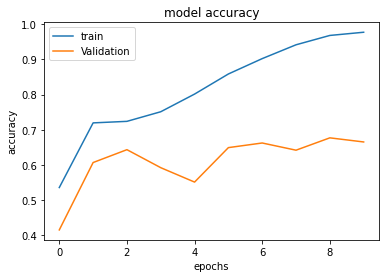

In [29]:
# Draw plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [30]:
# Save model
from tensorflow.keras.models import load_model
model.save('Final.h5')
model_ANN = load_model('Final.h5')

1/1 [==============================] - 0s 137ms/step
adidas


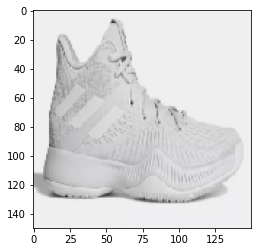

In [31]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = r"C:\Users\TUAN\Desktop\AI_cuoiky\lan_cuoi8\test\adidas\ADIDAS_68.png"

predict = ['adidas','nike','no_shoe','converse']
predict = np.array(predict)
img = load_img(filename,target_size=(150,150))
plt.imshow(img)


img = load_img(filename,target_size=(150,150))
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255

result = np.argmax(model_ANN.predict(img),axis=-1)
predict[result]

if(result==0):
    print("adidas")
if(result==2):
    print("nike")
if(result==3):
    print("no_shoe")
if(result==1):
    print("converse")